In [1]:
from pdb3 import lsext
import numpy as np
import os
import tol_colors as tc
import mplhelv
import matplotlib.pyplot as plt
import pickle

In [2]:
distI = pickle.load(open('../remaking_MSM/distI_refined_1p4ms_final.pkl','rb'))
weights = pickle.load(open('../remaking_MSM/msmweights_200_95.pkl','rb'))

In [4]:
import tol_colors as tc
tol_cmap = tc.tol_cmap('rainbow_PuBr')
def gap(x):
    m = np.max(x)
    n = np.min(x)
    gap = (m-n)/14
    return gap
def free_energy_plot(x,y,xmul=1,ymul=1,weightsClassA=None,fig_wid=10,fig_hig=7,vmax=5,nbins=200,cmap=tol_cmap):
    R = 0.001987
    T = 310
    x_data = x*xmul
    y_data = y*ymul
    Max_energy = vmax
    x_bins=nbins
    y_bins=nbins
    x_data_min =  np.min(x_data)
    y_data_min =  np.min(y_data)
    x_data_max =  np.max(x_data)
    y_data_max =  np.max(y_data)
    x_hist_lim_low =  x_data_min -0.5
    y_hist_lim_low =  y_data_min -0.5
    x_hist_lim_high = x_data_max +0.5
    y_hist_lim_high = y_data_max +0.5
    hist= np.histogram2d(x_data,y_data, bins=[x_bins,y_bins],
				 range = [[x_hist_lim_low,x_hist_lim_high],[y_hist_lim_low,y_hist_lim_high]],
				 density= True,weights=weightsClassA)
    prob_density = hist[0]
    prob_density = hist[0]
    xedge = hist[1]
    yedge = hist[2]
    x_bin_size = xedge[1]-xedge[0]
    y_bin_size = yedge[1]-yedge[0]
    free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
    min_free_energy = np.min(free_energy)
    delta_free_energy = free_energy - min_free_energy
    xx = [(xedge[i]+xedge[i+1])/2 for i in range(len(xedge)-1)]
    yy = [(yedge[i]+yedge[i+1])/2 for i in range(len(yedge)-1)]
    fig, axs = plt.subplots(1,1,figsize=(fig_wid,fig_hig))
    #cd = axs.contourf(xx,yy,delta_free_energy.T, vmin=0.0, vmax=Max_energy,cmap=cmap)
    contours = np.linspace(0,Max_energy,Max_energy+1)
    cdl = axs.contour(xx,yy,delta_free_energy.T,levels=range(int(Max_energy)+1),colors='k',linewidths = 0.2)
    cd = axs.contourf(xx,yy,delta_free_energy.T,np.linspace(0,Max_energy,30), vmin=0.0, vmax=Max_energy,cmap=cmap)
    cbar = fig.colorbar(cd,ticks=range(int(Max_energy)+1))
    cbar.ax.set_yticklabels(range(int(Max_energy)+1),size=20)
    cbar.ax.set_ylabel('Free Energy (kcal/mol)',fontsize=20)
    xlimlow = np.min(x_data)-gap(x_data)
    ylimlow = np.min(y_data)-gap(y_data)
    xlimhigh = np.max(x_data)+gap(x_data)
    ylimhigh = np.max(y_data)+gap(y_data)
    axs.set_xlim(xlimlow, xlimhigh)
    axs.set_ylim(ylimlow, ylimhigh)
    xticks = range(int(np.ceil(x_data_min)),int(np.floor(x_data_max)+1),2)
    yticks = range(int(np.ceil(y_data_min)),int(np.floor(y_data_max)+1),20)
    axs.set_xticks(xticks)
    axs.set_xticklabels(xticks)
    axs.set_yticks(yticks)
    axs.set_yticklabels(yticks)
    axs.tick_params(axis='both',labelsize=20)
    # axs.set_yticks(np.around(np.arange(y_lim_low,y_lim_high,2),2))
    # axs.set_yticklabels(np.around(np.arange(y_lim_low,y_lim_high,2),2))
    # plt.rc('xtick', labelsize=10)
    # plt.rc('ytick', labelsize=10)
    #plt.tight_layout()
    axs.grid(True,ls='--',alpha=0.7)
    fig.show()
    return fig,axs,cbar,delta_free_energy,xx,yy

(3113021, 2)


/tmp/ipykernel_124252/3878385766.py:33: RuntimeWarning: divide by zero encountered in log
  free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
/tmp/ipykernel_124252/2586200980.py:20: UserWarning: Use the colorbar set_ticks() method instead.
  c.ax.set_yticks(range(6))


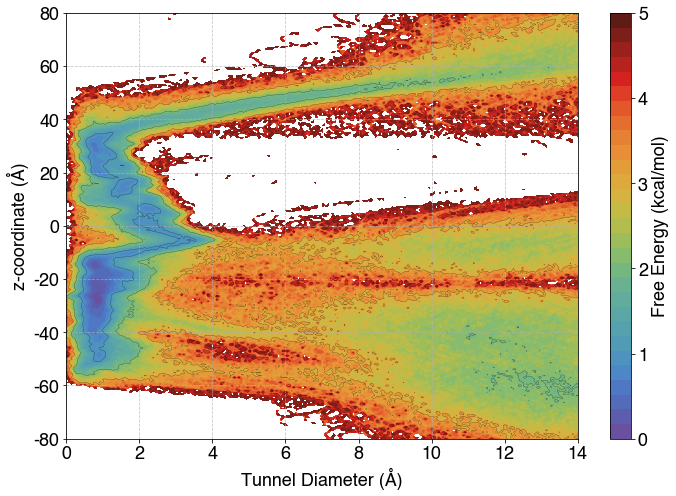

In [23]:
sys = 'left'
csvs = lsext(f'./hole_output/{sys}_csv/',".csv")[0]
total_data = []

for csv in csvs:
    if os.path.getsize(csv)!=0:
        y = np.genfromtxt(csv, delimiter=',')
        total_data.append(y)
        
total_data_c = np.concatenate(total_data)
print(total_data_c.shape)

        # print(y.shape)
# a,b,c = pyemma.plots.plot_free_energy(total_data_c[:,1],total_data_c[:,0],cmap=tol_cmap,nbins=300,kT=2.479/4.184,cbar_label='Free Energy (kcal/mol)',legacy=False,vmax=5)
a,b,c,fe,xx,yy = free_energy_plot(total_data_c[:,1],total_data_c[:,0],cmap=tol_cmap,nbins=300)
b.set_xlim(0,14)
b.set_ylim(-80,80)
b.set_yticks(range(-80,81,20))
b.set_yticklabels(range(-80,81,20))
c.ax.set_yticks(range(6))
c.ax.set_yticklabels(range(6))
c.ax.tick_params(axis='y',labelsize=18)
c.ax.set_ylabel('Free Energy (kcal/mol)',fontsize=18)
b.set_xlabel('Tunnel Diameter (Å)',fontsize=18)
b.set_ylabel('z-coordinate (Å)',fontsize=18)
b.tick_params(axis='both',labelsize=18)
a.set_size_inches(10,7)
a.tight_layout()
# a.savefig(f"{sys}_holeplot.png",transparent=True,dpi=300)


In [24]:
framedict = pickle.load(open(f'../TICA_plot_Analysis/{sys}_holeframes_to_trajframes.pkl','rb'))
# for csv in csvs:
#     print(csv)
weights_tunnel = []
for csv in csvs:
    if os.path.getsize(csv)!=0:
        y = np.genfromtxt(csv, delimiter=',')
        frameno = int(csv.split('_')[-1].split('.')[0])
        traj = framedict[frameno][0].replace('.xtc','').replace('.dcd','')
        frameno_traj = framedict[frameno][1]-1
        index = np.where(np.array(distI) == traj)[0][0]
        weights_traj = [weights[index][frameno_traj]]*len(y)
        weights_tunnel.append(weights_traj)

In [25]:
weights_tunnel_c = np.concatenate(weights_tunnel)
# weights_tunnel

/tmp/ipykernel_124252/3878385766.py:33: RuntimeWarning: divide by zero encountered in log
  free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
/tmp/ipykernel_124252/1712460180.py:6: UserWarning: Use the colorbar set_ticks() method instead.
  c.ax.set_yticks(range(6))


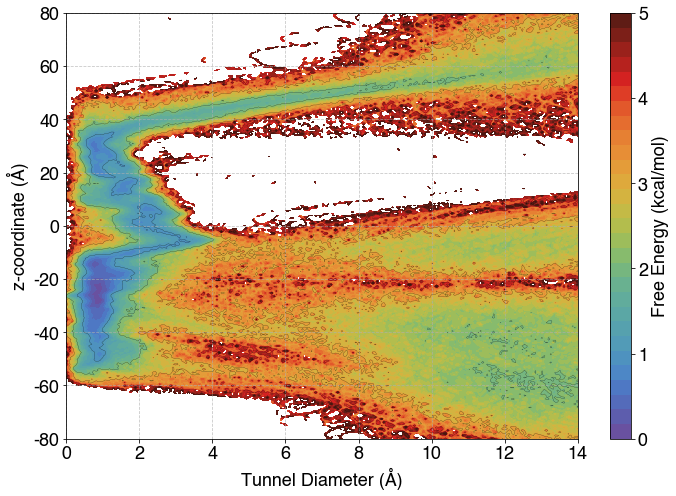

In [26]:
a,b,c,fe,xx,yy = free_energy_plot(total_data_c[:,1],total_data_c[:,0],cmap=tol_cmap,nbins=300,weightsClassA=weights_tunnel_c,vmax=5)
b.set_xlim(0,14)
b.set_ylim(-80,80)
b.set_yticks(range(-80,81,20))
b.set_yticklabels(range(-80,81,20))
c.ax.set_yticks(range(6))
c.ax.set_yticklabels(range(6))
c.ax.tick_params(axis='y',labelsize=18)
c.ax.set_ylabel('Free Energy (kcal/mol)',fontsize=18)
b.set_xlabel('Tunnel Diameter (Å)',fontsize=18)
b.set_ylabel('z-coordinate (Å)',fontsize=18)
b.tick_params(axis='both',labelsize=18)
a.set_size_inches(10,7)
a.tight_layout()
a.savefig(f"{sys}_holeplot_msmweights.png",transparent=True,dpi=300)

(3733065, 2)


/tmp/ipykernel_124252/3878385766.py:33: RuntimeWarning: divide by zero encountered in log
  free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
/tmp/ipykernel_124252/3787221014.py:19: UserWarning: Use the colorbar set_ticks() method instead.
  c.ax.set_yticks(range(6))


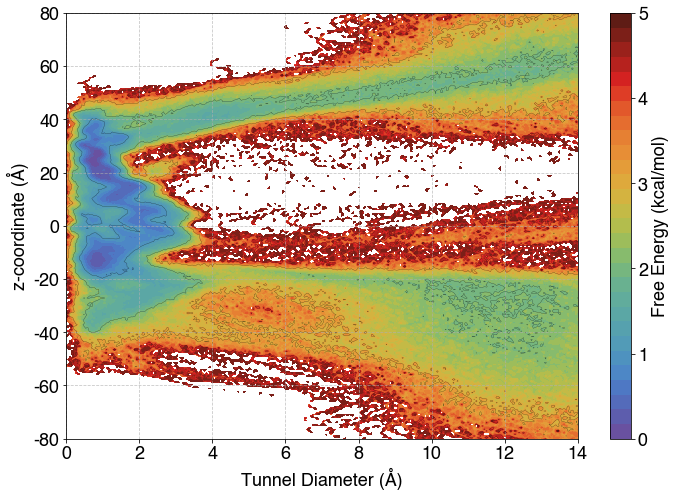

In [21]:
sys = 'bottom'
csvs = lsext(f'./hole_output/{sys}_csv/',".csv")[0]
total_data = []

for csv in csvs:
    if os.path.getsize(csv)!=0:
        y = np.genfromtxt(csv, delimiter=',')
        total_data.append(y)
        
total_data_c = np.concatenate(total_data)
print(total_data_c.shape)

        # print(y.shape)
a,b,c,fe,xx,yy = free_energy_plot(total_data_c[:,1],total_data_c[:,0],cmap=tol_cmap,nbins=300,vmax=5)
b.set_xlim(0,14)
b.set_ylim(-80,80)
b.set_yticks(range(-80,81,20))
b.set_yticklabels(range(-80,81,20))
c.ax.set_yticks(range(6))
c.ax.set_yticklabels(range(6))
c.ax.tick_params(axis='y',labelsize=18)
c.ax.set_ylabel('Free Energy (kcal/mol)',fontsize=18)
b.set_xlabel('Tunnel Diameter (Å)',fontsize=18)
b.set_ylabel('z-coordinate (Å)',fontsize=18)
b.tick_params(axis='both',labelsize=18)
a.set_size_inches(10,7)
a.tight_layout()
a.savefig(f"{sys}_holeplot_msmweights.png",transparent=True,dpi=300)



In [60]:
framedict = pickle.load(open(f'../TICA_plot_Analysis/{sys}_holeframes_to_trajframes.pkl','rb'))
# for csv in csvs:
#     print(csv)
weights_tunnel = []
for csv in csvs:
    if os.path.getsize(csv)!=0:
        y = np.genfromtxt(csv, delimiter=',')
        frameno = int(csv.split('_')[-1].split('.')[0])
        traj = framedict[frameno][0].replace('.xtc','').replace('.dcd','')
        frameno_traj = framedict[frameno][1]-1
        try:
            index = np.where(np.array(distI) == traj)[0][0]
        except IndexError:
            print(traj)
        weights_traj = [weights[index][frameno_traj]]*len(y)
        weights_tunnel.append(weights_traj)

SMO_Active_6XBL_CHLM_Pro_RUN_4_FAH02_CLONE16_strip


IndexError: index 954 is out of bounds for axis 0 with size 651

In [ ]:
weights_tunnel_c = np.concatenate(weights_tunnel)


In [ ]:
a,b,c,fe,xx,yy = free_energy_plot(total_data_c[:,1],total_data_c[:,0],cmap=tol_cmap,nbins=300,weightsClassA=weights_tunnel_c,vmax=5)
b.set_xlim(0,14)
b.set_ylim(-80,80)
b.set_yticks(range(-80,81,20))
b.set_yticklabels(range(-80,81,20))
c.ax.set_yticks(range(8))
c.ax.set_yticklabels(range(8))
c.ax.tick_params(axis='y',labelsize=18)
c.ax.set_ylabel('Free Energy (kcal/mol)',fontsize=18)
b.set_xlabel('Tunnel Diameter (Å)',fontsize=18)
b.set_ylabel('z-coordinate (Å)',fontsize=18)
b.tick_params(axis='both',labelsize=18)
a.set_size_inches(10,7)
a.tight_layout()
a.savefig(f"{sys}_holeplot_msmweights.png",transparent=True,dpi=300)

(3662185, 2)


/tmp/ipykernel_124252/3878385766.py:33: RuntimeWarning: divide by zero encountered in log
  free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
/tmp/ipykernel_124252/2542678438.py:19: UserWarning: Use the colorbar set_ticks() method instead.
  c.ax.set_yticks(range(6))


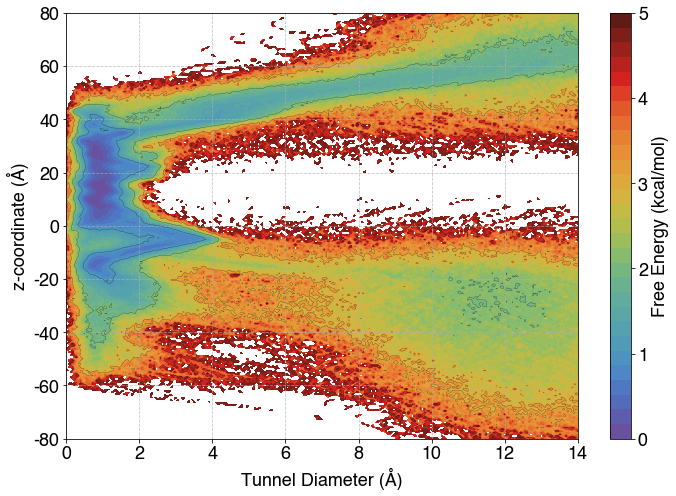

In [19]:
sys = 'entered_protein'
csvs = lsext(f'./hole_output/{sys}_csv/',".csv")[0]
total_data = []

for csv in csvs:
    if os.path.getsize(csv)!=0:
        y = np.genfromtxt(csv, delimiter=',')
        total_data.append(y)
        
total_data_c = np.concatenate(total_data)
print(total_data_c.shape)

        # print(y.shape)
a,b,c,fe,xx,yy = free_energy_plot(total_data_c[:,1],total_data_c[:,0],cmap=tol_cmap,nbins=300,vmax=5)
b.set_xlim(0,14)
b.set_ylim(-80,80)
b.set_yticks(range(-80,81,20))
b.set_yticklabels(range(-80,81,20))
c.ax.set_yticks(range(6))
c.ax.set_yticklabels(range(6))
c.ax.tick_params(axis='y',labelsize=18)
c.ax.set_ylabel('Free Energy (kcal/mol)',fontsize=18)
b.set_xlabel('Tunnel Diameter (Å)',fontsize=18)
b.set_ylabel('z-coordinate (Å)',fontsize=18)
b.tick_params(axis='both',labelsize=18)
a.set_size_inches(10,7)
a.tight_layout()
a.savefig(f"{sys}_holeplot_msmweights.png",transparent=True,dpi=300)

(1646742, 2)


/tmp/ipykernel_124252/3878385766.py:33: RuntimeWarning: divide by zero encountered in log
  free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
/tmp/ipykernel_124252/891792356.py:26: UserWarning: Use the colorbar set_ticks() method instead.
  c.ax.set_yticks(range(6))


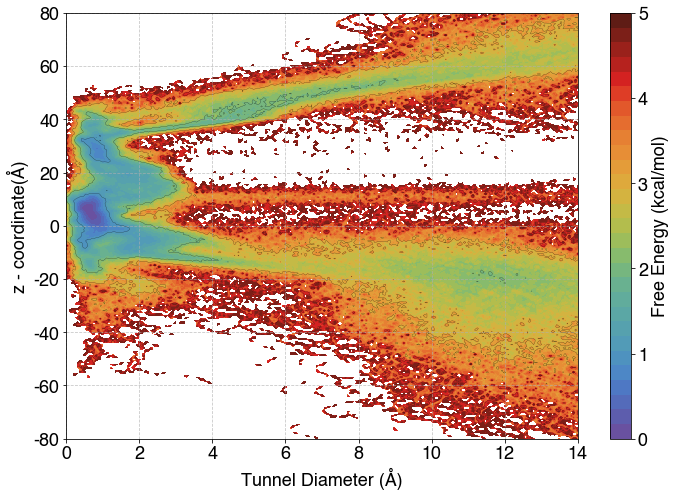

In [15]:
sys = 'membrane'
csvs = lsext(f'./hole_output/{sys}_csv/',".csv")[0]
total_data = []

for csv in csvs:
    if os.path.getsize(csv)!=0:
        y = np.genfromtxt(csv, delimiter=',')
        total_data.append(y)
        # print(y.shape)
reshape = [368,2865,4761,4764,4769]
for i,j in enumerate(total_data):
    if j.ndim==1:
        total_data[i] = total_data[i].reshape(-1,2)
# total_data[368] = total_data[368].reshape(-1,2)
# total_data[2865] = total_data[2865].reshape(-1,2)
# total_data[4761] = total_data[4761].reshape(-1,2)
# total_data[4764] = total_data[4764].reshape(-1,2)

total_data_c = np.concatenate(total_data)
print(total_data_c.shape)
a,b,c,fe,xx,yy = free_energy_plot(total_data_c[:,1],total_data_c[:,0],cmap=tol_cmap,nbins=300,vmax=5)
b.set_xlim(0,14)
b.set_ylim(-80,80)
b.set_yticks(range(-80,81,20))
b.set_yticklabels(range(-80,81,20))
c.ax.set_yticks(range(6))
c.ax.set_yticklabels(range(6))
c.ax.tick_params(axis='y',labelsize=18)
c.ax.set_ylabel('Free Energy (kcal/mol)',fontsize=18)
b.set_xlabel('Tunnel Diameter (Å)',fontsize=18)
b.set_ylabel('z - coordinate(Å)',fontsize=18)
b.tick_params(axis='both',labelsize=18)
a.set_size_inches(10,7)
a.tight_layout()
a.savefig(f"{sys}_holeplot_msmweights.png",transparent=True,dpi=300)



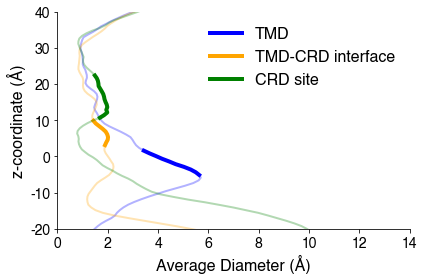

In [156]:
# for j in range(250):
# avgr = np.dot(prob_density.T,xx)/np.sum(prob_density,axis=0)
fig,axs = plt.subplots()
chllims = [[-5.2,2.2],[3.1,10.3],[10.7,23]]
color=['b','orange','g']
legend=['TMD','TMD-CRD interface','CRD site']
for l,i in enumerate(['left','bottom','membrane']):
    avgr = np.load(f'{i}_x.npy')
    yy = np.load(f'{i}_y.npy')
    yymin, yymax = chllims[l]
    chlpos = np.where((yy>yymin) & (yy< yymax))[0]
    axs.plot(avgr[chlpos],yy[chlpos],lw=4,label=legend[l],color=color[l])
    axs.plot(avgr,yy,lw=2,color=color[l],alpha=0.3)
    # ,label=legend[l])
axs.legend(fontsize=16,frameon=False)
axs.tick_params(axis='both',labelsize=14)
axs.set_xlabel('Average Diameter (Å)',fontsize=16)
axs.set_ylabel('z-coordinate (Å)',fontsize=16)
axs.spines['top'].set_linewidth(0)
axs.spines['right'].set_linewidth(0)
axs.set_ylim(-20,40)
axs.set_xlim(0,14)
axs.set_xticks(range(0,15,2))
fig.tight_layout()
fig.savefig('./Average_tunnel_radius.png',transparent=True,dpi=300)
fig.savefig('./Average_tunnel_radius.jpg',dpi=300)

# plt.ylim(-50,50)
# np.save(f'{sys}_x.npy',avgr)
# np.save(f'{sys}_y.npy',yy)